In this project, I will be fitting regression models to data from the Boston Housing Study. All the explanatory variables (except neighborhood) and all 506 census tract observations from the Boston Housing Study will be used for this analysis. I will be using the median value of homes in thousands of 1970 dollars. The four regression modeling methods used here will be:

1. Linear regression
2. Ridge regression
3. Random Forests
4. Gradient Boosting

These methods are evaluated within a cross-validation design, using root-mean-squared error (RMSE) as an index of prediction error.

After analyzing the results from the four methods, I would suggest using the Random Forests methods over others for assessing the Market Value of residential real estate. This is because the RMSE and R-Squared values obtained in the cross-validation design show that Random Forests method is performing better and has a better fit to the model data as per the Accuracy results on training and test datasets.

The two most important features in Boston data are lstat - "Percentage of population of lower socio-economic status" and rooms - "Average number of rooms per home" for predicting the Median Value of homes.

### Data Preparation

In [1]:
# Setting the seed to obtain reproducible results

RANDOM_SEED = 1

# Fitting the intercept term in the models

SET_FIT_INTERCEPT = True

# Importing base packages

import numpy as np
import pandas as pd

# Importing Modeling routines from Scikit Learn packages

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Reading data for the Boston Housing Study

boston_input = pd.read_csv('boston.csv')

# Displaying attribute list in Boston DataFrame
# This is necessary to check the attribute types and 
# If the fields can contain Null data or not

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# Dropping neighborhood attribute from the data being considered

boston = boston_input.drop('neighborhood', 1)

# Displaying descriptive stats of Boston DataFrame

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None

Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.06917

In [3]:
# Setting up the preliminary data model 
# the first column is the median housing value response
# the remaining columns are the explanatory variables

prelim_model_data = np.array(boston.reindex_axis(['mv'] + \
                                                 list(boston.columns[:-1]),
                                                 axis = 1))

# Looking at the data before standardization

print('\nData dimensions:', prelim_model_data.shape)

# Importing StandardScaler to standardize the model data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# the model data will be standardized form of preliminary model data

model_data = scaler.fit_transform(prelim_model_data)


Data dimensions: (506, 13)


### Comparing variations of Gradient Boosting method and Random Forests to get the models having good accuracy scores

In [4]:
# Importing Train Test Split to split the dataset 
# with 20% test and 80% train data

from sklearn.model_selection import train_test_split

trainingSet, testSet = train_test_split(model_data, test_size=0.2)

In [5]:
# Generating X and y for testing and training

train_rows = trainingSet.shape[0]-1
train_cols = trainingSet.shape[1]
test_rows = testSet.shape[0]-1
test_cols = testSet.shape[1]

X_train = trainingSet[0:train_rows,1:train_cols]
y_train = trainingSet[0:train_rows,0]
X_test = testSet[0:test_rows,1:test_cols]
y_test = testSet[0:test_rows,0]

In [6]:
# Comparing the accuracies of various models on train and test sets
        
gbrt = GradientBoostingRegressor(random_state = RANDOM_SEED, max_depth=1)
gbrt.fit(X_train, y_train)

print("Gradient Boosting Depth = 1")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,
                                                           y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt1 = GradientBoostingRegressor(random_state=RANDOM_SEED,
                                  learning_rate=0.01)
gbrt1.fit(X_train, y_train)

print("Gradient Learning Rate = 0.01")
print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train,
                                                            y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)))

gbrt2 = GradientBoostingRegressor(random_state = RANDOM_SEED, max_depth=5)
gbrt2.fit(X_train, y_train)

print("Gradient Boosting Depth = 5")
print("Accuracy on training set: {:.3f}".format(gbrt2.score(X_train,
                                                            y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt2.score(X_test, y_test)))

gbrt3 = GradientBoostingRegressor(random_state=RANDOM_SEED, learning_rate=1)
gbrt3.fit(X_train, y_train)

print("Gradient Learning Rate = 1")
print("Accuracy on training set: {:.3f}".format(gbrt3.score(X_train,
                                                            y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt3.score(X_test, y_test)))

rf = RandomForestRegressor(max_depth=5, random_state=RANDOM_SEED,
                                    n_estimators=100)
rf.fit(X_train, y_train)

print("Random Forest Depth = 5")
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

rf2 = RandomForestRegressor(max_features=5, random_state=RANDOM_SEED,
                                    n_estimators=100)
rf2.fit(X_train, y_train)

print("Random Forest Max Features = 5")
print("Accuracy on training set: {:.3f}".format(rf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf2.score(X_test, y_test)))

rf3 = RandomForestRegressor(max_leaf_nodes=5, random_state=RANDOM_SEED,
                                    n_estimators=100)
rf3.fit(X_train, y_train)

print("Random Forest Max Leaf Nodes = 5")
print("Accuracy on training set: {:.3f}".format(rf3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf3.score(X_test, y_test)))

Gradient Boosting Depth = 1
Accuracy on training set: 0.883
Accuracy on test set: 0.830
Gradient Learning Rate = 0.01
Accuracy on training set: 0.763
Accuracy on test set: 0.677
Gradient Boosting Depth = 5
Accuracy on training set: 0.997
Accuracy on test set: 0.884
Gradient Learning Rate = 1
Accuracy on training set: 1.000
Accuracy on test set: 0.795
Random Forest Depth = 5
Accuracy on training set: 0.936
Accuracy on test set: 0.853
Random Forest Max Features = 5
Accuracy on training set: 0.981
Accuracy on test set: 0.882
Random Forest Max Leaf Nodes = 5
Accuracy on training set: 0.820
Accuracy on test set: 0.804


After the comparison of Accuracy results, it can be said that the methods Gradient Boosting with Depth = 5, Random Forest with Depth = 5 and Random Forest with Max Features = 5 are giving better performance and I will be using these methods for my cross validation design.

### Regression of Data using Linear Regression, Ridge Regression, Random Forest and Gradient Boosting in the K-Fold design and Cross-Validation of the Models using RMSE

In [7]:
# Setting names list containing names of the regression models
# Setting the regressors list specifying the regression models
# In Ridge regression, we are keeping alpha = 1

names = ['Linear_Regression', 'Ridge_Regression alpha=1',
         'Random Forest Depth = 5', 'Random Forest Max Features = 5', 
         'Gradient Boosting Depth = 5'
        ]

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT, 
              normalize = False), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              RandomForestRegressor(max_depth=5, random_state=RANDOM_SEED,
                                    n_estimators=100),
              RandomForestRegressor(max_features=5, random_state=RANDOM_SEED,
                                    n_estimators=100),
              GradientBoostingRegressor(random_state=RANDOM_SEED, max_depth=5)
             ]

In [8]:
# Specifying the folds for validation - 10-fold cross-validation

from sklearn.model_selection import KFold

# Specifying the folds for validation - 10-fold cross-validation

N_FOLDS = 10

# Setting up numpy array for storing results

cv_results = np.zeros((N_FOLDS, len(names)))
cv_results_r2 = np.zeros((N_FOLDS, len(names)))

# Setting the KFold object using number of folds and 
# random seed set previously

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Checking the splitting process by looking at fold observation counts
# Initializing the fold count and looping through the splits of model data
# The variable index_for_fold will be used as the results array index

index_for_fold = 0 

# This loop will run 10 times, once for each fold

for train_index, test_index in kf.split(model_data):
        
#   1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable 
#   Storing the split index in a variable to avoid recalculation

    model_data_exp = model_data.shape[1]

# Generating Train and Test datasets for the current fold
   
    X_train = model_data[train_index, 1:model_data_exp]
    X_test = model_data[test_index, 1:model_data_exp]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

# Initializing the method count and looping through the methods 
# (Linear Regression and Ridge Regression)
# This loop will run twice, once for each method, per fold
# The variable index_for_method will be used as results array index
    
    index_for_method = 0
    for name, reg_model in zip(names, regressors):
        
        reg_model.fit(X_train, y_train)
        
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        
        cv_results_r2[index_for_fold, 
                      index_for_method] = r2_score(y_test, y_test_predict)
        
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

cv_results_df_r2 = pd.DataFrame(cv_results_r2)
cv_results_df_r2.columns = names

print('\nRMSE for 10 FOLDS\n')

cv_results_df.append(cv_results_df.mean().T,
                     ignore_index=True).rename(index={10:'mean'})


RMSE for 10 FOLDS



,Linear_Regression,Ridge_Regression alpha=1,Random Forest Depth = 5,Random Forest Max Features = 5,Gradient Boosting Depth = 5
0,0.308034,0.306744,0.373782,0.332930,0.308764
1,0.414889,0.412916,0.239140,0.244068,0.235610
2,0.438938,0.435998,0.234021,0.199842,0.289151
3,0.652244,0.653196,0.519690,0.528031,0.733590
4,0.621783,0.620399,0.380280,0.367053,0.372444
5,0.496012,0.495756,0.546168,0.456488,0.495089
6,0.343828,0.341483,0.329878,0.326521,0.278535
7,1.340827,1.339664,1.038800,0.956999,0.977591
8,0.669705,0.669238,0.617151,0.446687,0.676413
9,0.333138,0.329718,0.397976,0.380154,0.416641


In [9]:
print('\nR-Squared for 10 FOLDS\n')

cv_results_df_r2.append(cv_results_df_r2.mean().T,
                        ignore_index=True).rename(index={10:'mean'})


R-Squared for 10 FOLDS



,Linear_Regression,Ridge_Regression alpha=1,Random Forest Depth = 5,Random Forest Max Features = 5,Gradient Boosting Depth = 5
0,0.765075,0.767038,0.654085,0.725566,0.763960
1,0.460676,0.465792,0.820820,0.813359,0.826071
2,-1.311175,-1.280315,0.343045,0.520930,-0.002942
3,0.632886,0.631812,0.766939,0.759397,0.535605
4,0.534229,0.536301,0.825778,0.837688,0.832884
5,0.724891,0.725174,0.666440,0.766987,0.725914
6,0.378268,0.386722,0.427695,0.439283,0.591983
7,-0.014566,-0.012806,0.391026,0.483158,0.460677
8,-1.041001,-1.038159,-0.733244,0.092007,-1.082091
9,0.477957,0.488621,0.254972,0.320204,0.183452


The mean RMSE value of Random Forests is better (lower) than Gradient Boosting, Ridge Regression and Linear Regression and the R-Squared values of Random Forests are better (higher) than Gradient Boosting, Ridge Regression and Linear Regression. This shows that Random Forests have better performance on the data and can do a better job at predicting the value of the response variable (the median value of homes) using the explanatory variables. Out of the two Random Forest methods that I have tried the model with Max Features 5 gives better performance stats than the one with Depth 5. However, this could differ on different sets of data and the results could change with changes to data but overall, I would recommend using Random Forests as the Machine Learning method over other methods.

### Feature Importances

Feature ranking:
1. feature lstat (0.358594)
2. feature rooms (0.319967)
3. feature dis (0.059341)
4. feature crim (0.058158)
5. feature nox (0.052361)
6. feature ptratio (0.044856)
7. feature indus (0.043893)
8. feature age (0.026910)
9. feature tax (0.024183)
10. feature rad (0.006871)
11. feature zn (0.002950)
12. feature chas (0.001917)


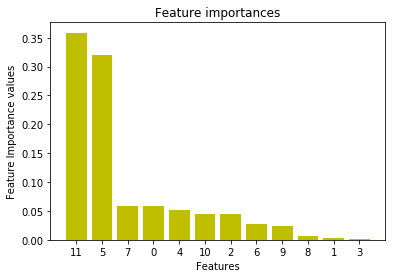

In [10]:
# Setting feature names for the results
feature_names = ['crim', 'zn', 'indus', 'chas', 'nox',
                 'rooms', 'age', 'dis', 'rad',
                 'tax', 'ptratio', 'lstat']

f_name = feature_names

# getting model data
nrows = model_data.shape[0]-1
ncols = model_data.shape[1]

X = model_data[0:nrows,1:ncols]
y = model_data[0:nrows,0]

# using rf2 defined above as
# RandomForestRegressor(n_estimators = 100,
# random_state = RANDOM_SEED, max_features = 5)

rf2.fit(X, y)

f_imp = rf2.feature_importances_
std = np.std([f_imp for tree in rf2.estimators_],
             axis=0)
indices = np.argsort(f_imp)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]],
                                   f_imp[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), f_imp[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Feature Importance values")
plt.xlabel("Features")
plt.show()

By looking at feature importance statistics it is observed that the most important features in Boston data are lstat - "Percentage of population of lower socio-economic status" and rooms - "Average number of rooms per home". These two attributes are more important in predicting the Median Value of homes.